# Bank Review Complaints analysis BY SHASHVINDU JHA MAIL jhashashvindu@yahoo.com

In [4]:
from pyforest import *

import string
import re
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud ,STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.wsd import lesk
from nltk.stem import PorterStemmer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

In [11]:
import numpy as np
import pandas as pd


In [5]:
data = pd.read_excel('BankReviews.xlsx')
data.head()

<IPython.core.display.Javascript object>

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [7]:
TextBlob(data.Reviews[0]).detect_language()

'en'

# Generating New Festures

In [12]:
#Generating New Festures
eng_stopword= set(stopwords.words('english'))
data['Reviews'] = data['Reviews'].astype(str)
data['count_sent'] = data['Reviews'].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [13]:
#word count
data['count_word'] = data.Reviews.apply(lambda x : len(str(x).split()))

In [16]:
#Unique word count
data['count_unique_word'] = data.Reviews.apply(lambda x: len(set(str(x).split())))


In [17]:
#Letter count
data['count_letters'] = data.Reviews.apply(lambda x:len(str(x)))


In [18]:
#word density
data['word_density'] = data.count_letters / data.count_word+1


In [20]:
#punctuation count
data['count_punctuation'] = data.Reviews.apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


In [21]:
#upper case word count
data['count_word_upper'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#lower case word count
data['count_word_lower'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.islower()]))


In [22]:
# title case words count
data['count_word_title'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


In [23]:
#number of stop words
data['count_stopwords'] = data.Reviews.apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopword]))


In [24]:
#Average length of words
data['mean_word_len'] =  data.Reviews.apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [25]:
#number of numeric
data['numeric'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isdigit()]))


In [26]:
#number of alphanumeric
data['alphanumeric'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isalnum()]))


In [27]:
#number of alphabetic
data['alphabetic'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isalpha()]))


In [28]:
#count the occurence of all words
data['wordcounts'] = data.Reviews.apply(lambda x: dict([[t,x.split().count(t)] for t in set(x.split())]))
data.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,numeric,alphabetic,count_unique_word,count_letters,word_density,count_punctuation,count_word_upper,count_word_lower,count_word_title,count_stopwords,mean_word_len,alphanumeric,wordcounts
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,0,15,19,126,7.631579,4,0,14,5,5,5.684211,15,"{'professional': 1, 'us': 1, 'and': 1, 'Wyndha..."
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,0,21,23,159,7.360000,4,0,20,5,10,5.400000,21,"{'excellent': 1, 'service,': 1, 'professional'..."
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,0,73,64,462,6.848101,8,0,64,14,31,4.860759,73,"{'encountered': 1, 'only': 1, 'us': 2, 'went':..."
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,0,101,78,605,6.601852,9,0,88,18,49,4.611111,101,"{'LindRead': 1, 'started': 1, 'only': 1, 'the'..."
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,0,53,47,341,6.779661,6,3,50,9,30,4.796610,53,"{'me': 2, 'service,': 1, 'professional': 1, 'r..."


In [30]:
pos_family = {'noun' : ['NN','NNS','NNP','NNPS'],'pron':['PRP','PRP$','WP','WP$'],'verb':['VB','VBD','VBG','VBN','VBP','VBZ'],'adj':['JJ','JJR','JJS'],'adv':['RB','RBR','RBS','WRB']}
#function to chek and get the pert of speech tag count of a words in a given sentence
def check_pos_tag(x,flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt+=1
    except:
        pass
    return cnt

data['noun_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'noun'))
data['pron_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'pron'))
data['verb_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'verb'))
data['adj_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'adj'))
data['adv_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'adv'))
data.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,numeric,alphabetic,count_unique_word,count_letters,...,count_word_title,count_stopwords,mean_word_len,alphanumeric,wordcounts,noun_count,pron_count,verb_count,adj_count,adv_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,0,15,19,126,...,5,5,5.684211,15,"{'professional': 1, 'us': 1, 'and': 1, 'Wyndha...",0,0,0,0,0
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,0,21,23,159,...,5,10,5.400000,21,"{'excellent': 1, 'service,': 1, 'professional'...",0,0,0,0,0
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,0,73,64,462,...,14,31,4.860759,73,"{'encountered': 1, 'only': 1, 'us': 2, 'went':...",0,0,0,0,0
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,0,101,78,605,...,18,49,4.611111,101,"{'LindRead': 1, 'started': 1, 'only': 1, 'the'...",0,0,0,0,0
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,0,53,47,341,...,9,30,4.796610,53,"{'me': 2, 'service,': 1, 'professional': 1, 'r...",0,0,0,0,0


### Data processing

In [31]:
#splitting data
X = data.Reviews
y = data.Stars
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =123)

In [34]:
# Tokenization
def tokenization(text):
    text = word_tokenize(text)
    return(text)
token_X_train = X_train.apply(lambda x: tokenization(x))
token_X_test = X_test.apply(lambda x: tokenization(x))

In [37]:
token_X_train

216    [Steve, got, it, done, when, others, could, n'...
234    [They, increased, my, rate, ,, quoted, me, dif...
95     [I, thought, they, seemed, very, nice, at, fir...
54     [Genna, Englert, provided, excellent, service,...
313    [Super, responsive, and, very, thorough, ., I,...
                             ...                        
98     [Based, on, results, I, have, to, give, 1, sta...
476    [I, was, hesitant, to, use, a, non-local, mort...
322    [Anthony, Marroquin, and, his, team, were, kno...
382    [Dean, has, been, such, a, huge, help, !, He, ...
365    [Guaranteed, Rate, provided, us, a, seamless, ...
Name: Reviews, Length: 404, dtype: object

In [38]:
token_X_test

372    [Was, a, quick, and, easy, process, ., They, w...
310    [Ethan, our, mortgage, banker, from, DLJ, Fina...
444    [My, wife, and, I, have, purchased, several, h...
421    [I, worked, with, Kory, and, Carla, at, NASB, ...
429    [Jon, Barrett, was, a, great, asset, to, my, h...
                             ...                        
102    [I, feel, they, made, promises, that, they, co...
148    [Had, slight, difficulty, with, online, docume...
344    [I, worked, with, Sam, Fazio, on, a, home, pur...
466    [Alex, was, extremely, helpful, and, always, a...
202    [Aaron, was, extremely, help, and, very, frien...
Name: Reviews, Length: 101, dtype: object

In [36]:
# POS Tagging 
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return(text)
pos_tag_X_train = token_X_train.apply(lambda x: pos_tagging(x))
pos_tag_X_test = token_X_test.apply(lambda x: pos_tagging(x))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
pos_tag_X_train

216    [(Steve, NNP), (got, VBD), (it, PRP), (done, V...
234    [(They, PRP), (increased, VBD), (my, PRP$), (r...
95     [(I, PRP), (thought, VBD), (they, PRP), (seeme...
54     [(Genna, NNP), (Englert, NNP), (provided, VBD)...
313    [(Super, NNP), (responsive, NN), (and, CC), (v...
                             ...                        
98     [(Based, VBN), (on, IN), (results, NNS), (I, P...
476    [(I, PRP), (was, VBD), (hesitant, NN), (to, TO...
322    [(Anthony, NNP), (Marroquin, NNP), (and, CC), ...
382    [(Dean, NNP), (has, VBZ), (been, VBN), (such, ...
365    [(Guaranteed, VBN), (Rate, NNP), (provided, VB...
Name: Reviews, Length: 404, dtype: object

In [40]:
pos_tag_X_test

372    [(Was, WRB), (a, DT), (quick, JJ), (and, CC), ...
310    [(Ethan, NNP), (our, PRP$), (mortgage, NN), (b...
444    [(My, PRP$), (wife, NN), (and, CC), (I, PRP), ...
421    [(I, PRP), (worked, VBD), (with, IN), (Kory, N...
429    [(Jon, NNP), (Barrett, NNP), (was, VBD), (a, D...
                             ...                        
102    [(I, PRP), (feel, VBP), (they, PRP), (made, VB...
148    [(Had, NNP), (slight, VBD), (difficulty, NN), ...
344    [(I, PRP), (worked, VBD), (with, IN), (Sam, NN...
466    [(Alex, NNP), (was, VBD), (extremely, RB), (he...
202    [(Aaron, NNP), (was, VBD), (extremely, RB), (h...
Name: Reviews, Length: 101, dtype: object

In [41]:
lesk?

In [43]:
# Disambiguation
syn = lesk(X_train,'refinance','v')
print(syn)
print(syn.name())
print(syn.definition()) # meaning of refinance
print(syn.examples())
print(syn.hypernyms()) # opposite word of refinance
print(syn.hyponyms())
print(syn.lemmas())

Synset('refinance.v.01')
refinance.v.01
renew the financing of
[]
[Synset('finance.v.01')]
[]
[Lemma('refinance.v.01.refinance')]


In [44]:
#Clean up of non- textual data (white space, numbers, symbols)
def clean_text(text):
    text = text.lower() # convert text to lower case
    text = text.strip()
    text = re.sub(r'  ', ' ',text) # replacing double space with single space
    text = text.replace('/','') #  replacing / with none
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?$,'0-9]", "", text) # replacing special character and number with none
    return(text)
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [45]:
X_train

216    steve got it done when others couldnt  day clo...
234    they increased my rate quoted me different clo...
95     i thought they seemed very nice at first playe...
54     genna englert provided excellent service the p...
313    super responsive and very thorough \r\n\r\ni w...
                             ...                        
98     based on results i have to give  star my initi...
476    i was hesitant to use a nonlocal mortgage comp...
322    anthony marroquin and his team were knowledgea...
382    dean has been such a huge help he took my call...
365    guaranteed rate provided us a seamless loan ex...
Name: Reviews, Length: 404, dtype: object

In [46]:
X_test

372    was a quick and easy process they worked with ...
310    ethan our mortgage banker from dlj financial w...
444    my wife and i have purchased several homes ove...
421    i worked with kory and carla at nasb they were...
429    jon barrett was a great asset to my husband an...
                             ...                        
102    i feel they made promises that they could not ...
148    had slight difficulty with online documents an...
344    i worked with sam fazio on a home purchase not...
466    alex was extremely helpful and always availabl...
202    aaron was extremely help and very friendly i k...
Name: Reviews, Length: 101, dtype: object

In [47]:
#Stop word Removal
stop = set(nltk.corpus.stopwords.words('english'))
def stop_word_removal(text):
    # Removing stop words
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # correct spelling corrections
    text = text.apply(lambda x: str(TextBlob(x).correct()))
    return(text)


<IPython.core.display.Javascript object>

In [48]:
X_train = stop_word_removal(X_train)
X_train

216    steve got done others couldn day closing even ...
234    increased rate quoted different closing costs ...
95     thought seemed nice first played phone tag got...
54     genoa neglect provided excellent service proce...
313    super responsive thorough look next transactio...
                             ...                        
98     based results give star initial conversations ...
476    resistant use nonmoral mortgage company loan o...
322    anthony marroquin team knowledgeable provided ...
382    dean huge help took call work gave undivided a...
365    guaranteed rate provided us fearless loan expe...
Name: Reviews, Length: 404, dtype: object

In [49]:
X_test = stop_word_removal(X_test)
X_test

372    quick easy process worked find loan would fit ...
310    than mortgage banker all financial absolutely ...
444    wife purchased several homes years worked numb...
421    worked tory carl naso superb team provided exc...
429    on garrett great asset husband made mortgage l...
                             ...                        
102    feel made promises could keep made mistakes pe...
148           slight difficulty online documents signing
344    worked sam fair home purchase provide low inte...
466    flex extremely helpful always available questi...
202    aaron extremely help friendly kept everything ...
Name: Reviews, Length: 101, dtype: object

In [50]:
#lemmatization
def lemmatization(text):
    #Lemmatization
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    #Removing nouns etc
    text = text.apply(lambda x: " ".join(word for word,pos in nltk.pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS']))
    return(text)


In [51]:
X_train = lemmatization(X_train)
X_train 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

216    got done couldn closing even got done get done...
234    increased quoted different different took need...
95     seemed nice first played got interested would ...
54     provided excellent smooth fast would recommend...
313    super responsive thorough next answered prompt...
                             ...                        
98     based give initial provided into based said wo...
476    resistant nonmoral enemy involved process loca...
322    provided entire left looking incredible costef...
382    huge took call gave undivided helped would hig...
365    guaranteed provided u fearless beginning wonde...
Name: Reviews, Length: 404, dtype: object

In [57]:
X_test = lemmatization(X_test)
X_test

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

372         quick easy worked would fit satisfied entire
310    than all financial absolutely finish kept u up...
444    purchased several worked different far best ev...
421    worked provided excellent knowledgeable throug...
429    on great made extremely simple on knowledgeabl...
                             ...                        
102    made could keep made personally around would c...
148                                                     
344    worked sam fair provide low low detailed intro...
466    flex extremely helpful always available consta...
202    extremely friendly kept always front made go e...
Name: Reviews, Length: 101, dtype: object

In [53]:
#Vectorization for train Only
count_vect = CountVectorizer(analyzer = 'word',token_pattern = r'\w{1,}',ngram_range= (1,1),min_df=5,encoding = 'latin-1',max_features=800)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<404x388 sparse matrix of type '<class 'numpy.int64'>'
	with 5678 stored elements in Compressed Sparse Row format>

In [54]:
X_train_dtm = X_train_counts.toarray()
X_train_dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
#Examining the tokens and their counts
X_train_tokens = count_vect.get_feature_names()
print('Top 50 Tokens \n')
print(X_train_tokens[:50],'\n')
print('*'*30)
print('Last 50 Tokens \n')
print(X_train_tokens[-50:])

Top 50 Tokens 

['aaron', 'able', 'absolutely', 'accept', 'across', 'adam', 'additional', 'agent', 'ago', 'agreed', 'all', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'american', 'annoyed', 'another', 'answer', 'answered', 'answering', 'appreciated', 'approved', 'around', 'ask', 'asked', 'asking', 'aspect', 'available', 'away', 'awesome', 'back', 'bad', 'based', 'beat', 'became', 'begin', 'beginning', 'believe', 'beneficial', 'bent', 'best', 'better', 'beyond', 'big', 'bought', 'buy', 'buying'] 

******************************
Last 50 Tokens 

['talked', 'talking', 'tell', 'telling', 'thank', 'thankful', 'that', 'thorough', 'thought', 'thousand', 'throughout', 'timely', 'together', 'told', 'took', 'top', 'tormented', 'total', 'tree', 'tried', 'true', 'truly', 'trusted', 'trying', 'two', 'u', 'understood', 'unlike', 'upon', 'use', 'used', 'using', 'usually', 'various', 'via', 'walked', 'want', 'wanted', 'well', 'went', 'whole', 'within', 'without', 'wonderful', 'worked', 

In [56]:
#count how many times each token appears accross all document in X_train_dtm
X_train_counts = np.sum(X_train_dtm,axis=0)
X_train_counts[:50]

array([ 5, 35, 10,  6, 13, 20, 14,  5,  5,  7, 22, 14, 15,  9, 35, 60, 26,
        8,  5, 27, 19, 22, 10, 10,  6, 14, 19, 24,  9,  6, 21,  8, 10, 34,
       15,  7,  6,  7,  5, 26,  6, 14,  5, 70, 24, 16,  7,  6, 18,  7],
      dtype=int64)

In [58]:
# Creating a DataFrame of tokens with their counts
token_count = pd.DataFrame({'token':X_train_tokens,'count':X_train_counts})
token_count.sort_values(by=['count'],ascending = False,inplace = True)
print(token_count.shape)
token_count.head()

(388, 2)


,token,count
384,would,197
363,u,145
164,great,115
294,recommend,104
222,made,89


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

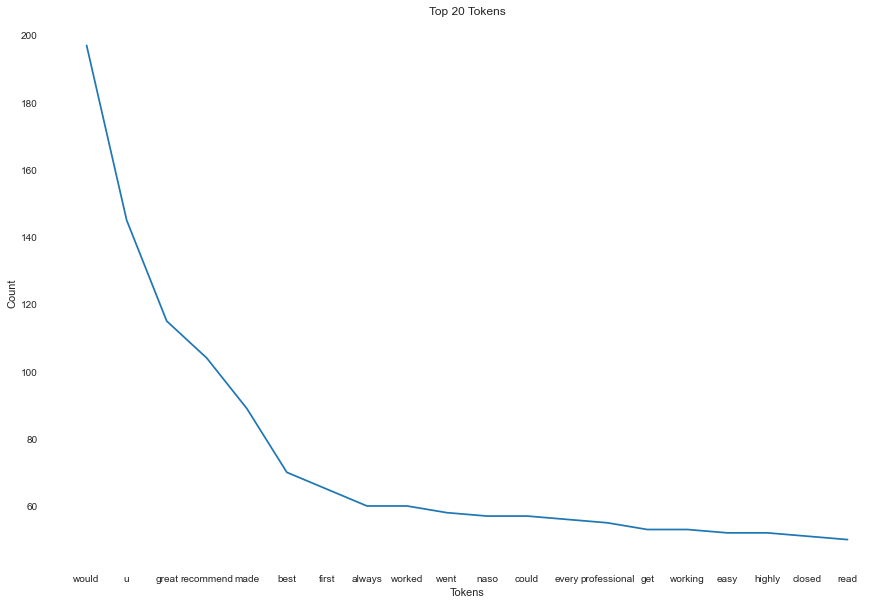

In [59]:
# Counting Words Appearing in a text(a frequency distribution)
top20 = token_count[:20]
plt.figure(figsize=(15,10))
plt.plot('token','count',data=top20)
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('Top 20 Tokens')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

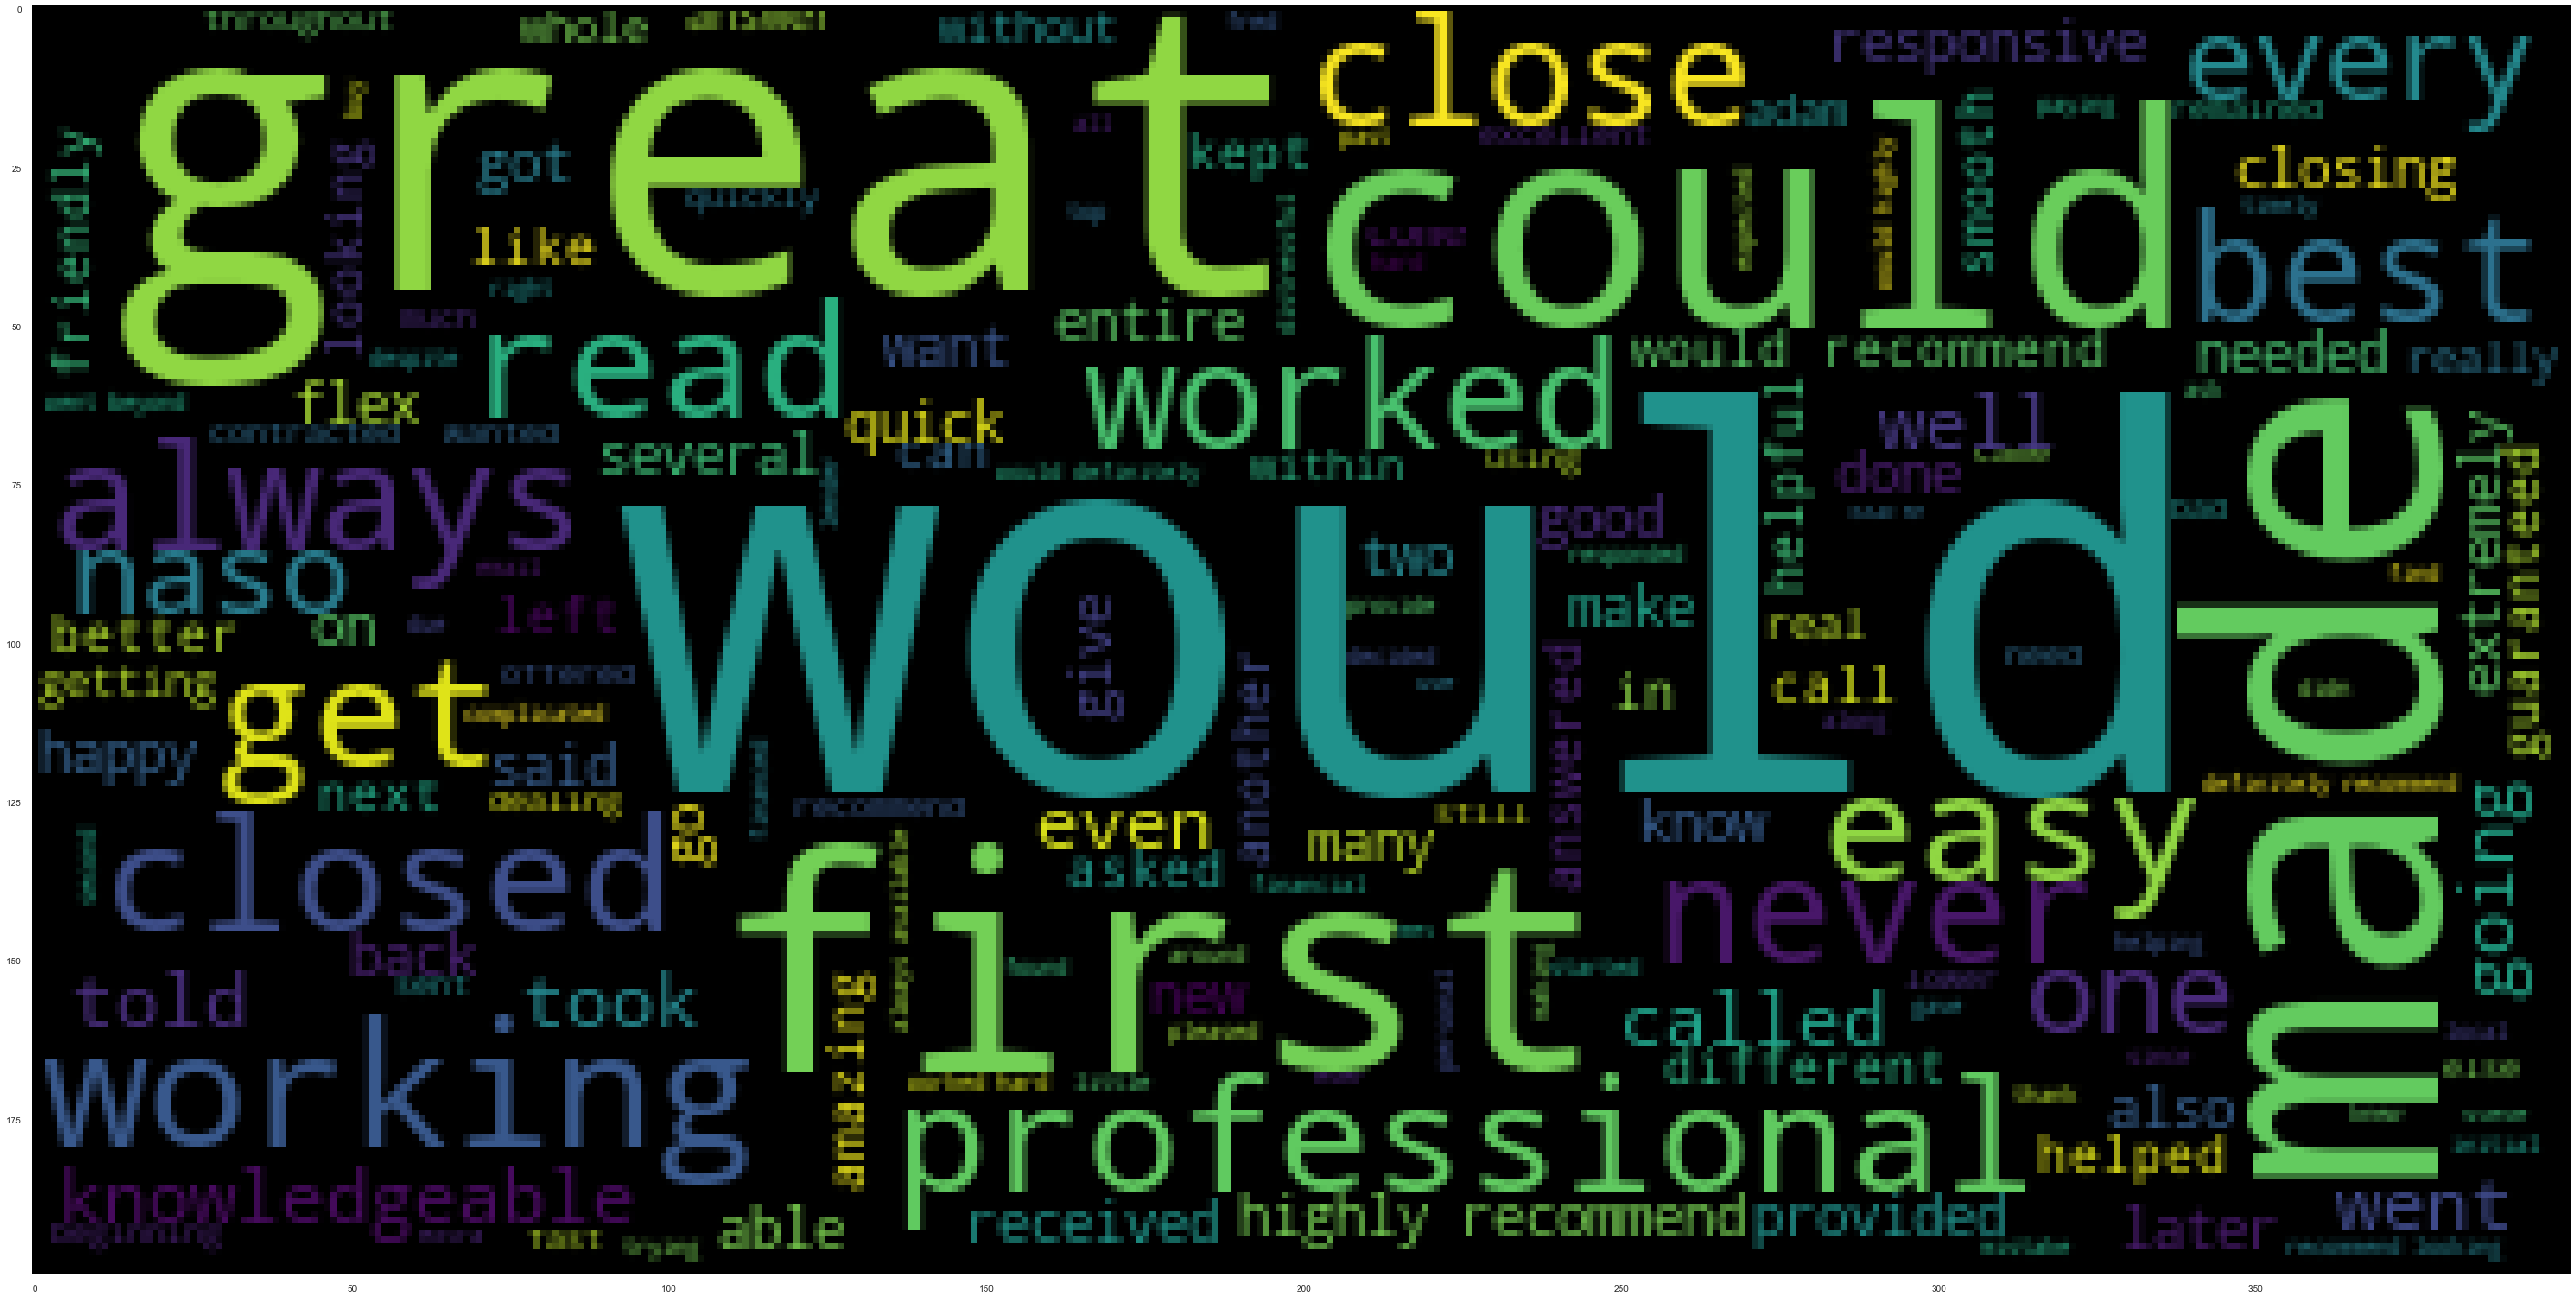

In [60]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

fig = plt.figure(figsize=(50,35))
plt.imshow(wordcloud)

In [61]:
#Classify reviews to positive,negative and neutral
# we use textblob utility to calculate
def get_sentiment(text):
    analysis = TextBlob(text)    # create TextBlob objectof passed text
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


In [62]:
text = X_train
sentiment = X_train.apply(lambda x: get_sentiment(x))
table = pd.concat([text,sentiment],axis = 1)
column_name = table.columns.values
column_name[1]= 'sentiment'
table.columns = column_name
table.head()

,Reviews,sentiment
216,got done couldn closing even got done get done...,positive
234,increased quoted different different took need...,negative
95,seemed nice first played got interested would ...,positive
54,provided excellent smooth fast would recommend...,positive
313,super responsive thorough next answered prompt...,positive


In [64]:
#Checking Reviews Percentage
positive = table[table.sentiment == 'positive']
print('Positive Reviews Percentage: {} %'.format(100*len(positive)/len(table.Reviews)))
negative = table[table.sentiment == 'negative']
print('negative Reviews Percentage: {} %'.format(100*len(negative)/len(table.Reviews)))
neutral = table[table.sentiment == 'neutral']
print('neutral Reviews Percentage: {} %'.format(100*(len(table.Reviews)-len(negative)-len(positive))/len(table.Reviews)))

Positive Reviews Percentage: 87.87128712871286 %
negative Reviews Percentage: 8.168316831683168 %
neutral Reviews Percentage: 3.9603960396039604 %


In [65]:
#Checking Top Positive and Negitive Reviews
print("TOP 5 Positive Reviews \n\n",positive.head()['Reviews'].tolist(),'\n')


TOP 5 Positive Reviews 

 ['got done couldn closing even got done get done recommended went great', 'seemed nice first played got interested would file left and remained incorrect since maybe said interested in die straight', 'provided excellent smooth fast would recommend first', 'super responsive thorough next answered promptly ben', 'worked sam provide low low detailed introduced wonderful well clear close ahead impressed provided recommend know looking read'] 



In [66]:
print("TOP 5 Negative Reviews \n\n",negative.head()['Reviews'].tolist(),'\n')

TOP 5 Negative Reviews 

 ['increased quoted different different took needed mattered least', 'intake rep nice seemed annoyed that bad webster positive hope review past initial required & required pick selected poor honestly dont would leave blank', 'responsive worked hard u approved on really made u like', 'aware critical delayed several finally upon also several later promised pay wrong due late next thomas cordial stayed constant overall incorrect due would make impossible whole', 'lender quite gave needed even pulled negative said sending ever sent called back told else sends would send next poor poor poor read'] 



### K-Means Cluster Analysis

In [67]:
tf_idf_vectorizor = TfidfVectorizer(max_features=20000)
tf_idf = tf_idf_vectorizor.fit_transform(X_train)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [68]:
class Kmeans:
    def __init__(self,k,seed = None,max_iter = 200):
        self.k =k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
            self.max_iter = max_iter
    def initialise_centroid(self,x):
        
        initial_centroid = np.random.permutation(x.shape[0])[:self.k]
        self.centroid = x[initial_centroid]
        return self.centroid
    def assign_cluster(self,x):
        if x.ndim ==  1:
            x = x.reshape(-1,1)
        dist_to_centroid = pairwise_distances(x,self.centroid,metric = 'euclidean')
        self.cluster_label = np.argmin(dist_to_centroid,axis = 1)
        return self.cluster_label
    def update_centroid(self,x):
        self.centroid = np.array([x[self.cluster_label==i].mean(axis=0) for i in range(self.k)])
        return self.centroid
    def predict(self,x):
        return self.assign_cluster(x)
    def fit_kmeans(self,x):
        self.centroid = self.initialise_centroid(x)
        
        for iter in range(self.max_iter): #main kmeans loop
            self.cluster_label = self.assign_cluster(x)
            self.centroid = self.update_centroid(x)
            if iter % 100 == 0:
                print("Running Model Iteration %d"%iter)
        print('Model finished running')
        return self

[KMeans(max_iter=600, n_clusters=1), KMeans(max_iter=600, n_clusters=2), KMeans(max_iter=600, n_clusters=3), KMeans(max_iter=600, n_clusters=4), KMeans(max_iter=600, n_clusters=5), KMeans(max_iter=600, n_clusters=6)]
[-15.380170811567782, -9.099291821663673, -5.647447997680626, -3.6957389659935487, -2.4404046995931257, -2.0933929584966613]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

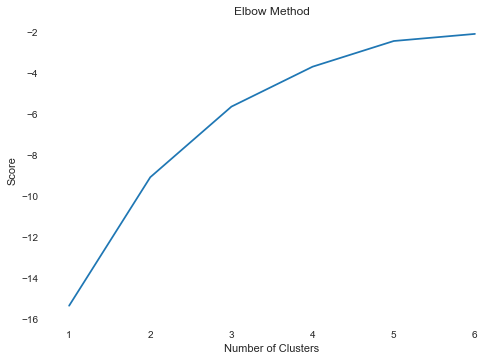

In [70]:
number_cluster = range(1,7)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = [KMeans(n_clusters=i,max_iter=600)for i in number_cluster]
print(kmeans)
score  = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
print(score)
plt.plot(number_cluster,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0
Running Model Iteration 100
Running Model Iteration 200
Running Model Iteration 300
Running Model Iteration 400
Running Model Iteration 500
Model finished running


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

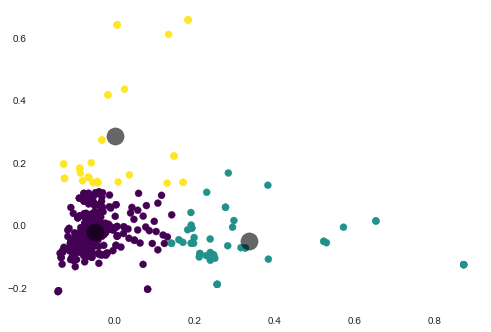

In [71]:
test_e = Kmeans(3,1,600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1],c=predicted_values,s=50,cmap = 'viridis')
centers = fitted.centroid
plt.scatter(centers[:,0],centers[:,1],c='black', s=300,alpha=0.6)

In [72]:
sklearn_pca= PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3,max_iter=600,algorithm='auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [73]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
def get_top_features_cluster(tf_idf_array,prediction,n_feats):
    labels = np.unique(prediction)
    dfs= []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp],axis=0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i],x_means[i])for i in sorted_means]
        df = pd.DataFrame(best_features,columns = ['features','score'])
        dfs.append(df)
    return dfs
df1,df2,df3 = get_top_features_cluster(tf_idf_array,prediction,15)
df1

,features,score
0,would,0.046707
1,recommend,0.035134
2,best,0.027264
3,naso,0.025129
4,made,0.024300
5,professional,0.023831
6,worked,0.022763
7,highly,0.022730
8,closed,0.021994
9,get,0.021336


In [75]:
df2

,features,score
0,great,0.352066
1,always,0.075097
2,easy,0.066377
3,quick,0.050136
4,answered,0.045932
5,professional,0.040906
6,throughout,0.036990
7,first,0.034574
8,made,0.033937
9,recommend,0.031399


In [76]:
df3

,features,score
0,on,0.594148
1,made,0.150057
2,simple,0.119270
3,passing,0.116949
4,helpful,0.099899
5,approved,0.095544
6,extremely,0.093383
7,along,0.090868
8,knowledgeable,0.086842
9,worked,0.076276


<IPython.core.display.Javascript object>

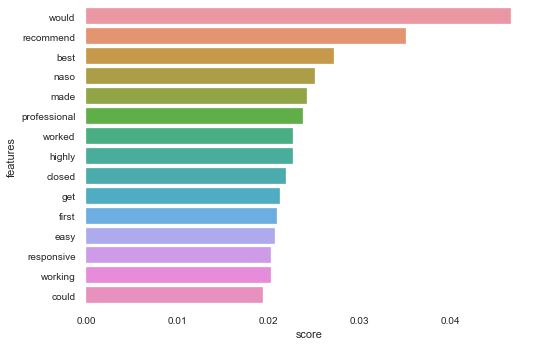

In [77]:
# cluster1 top 15 words
sns.barplot(x = 'score',y = 'features',data = df1)

<IPython.core.display.Javascript object>

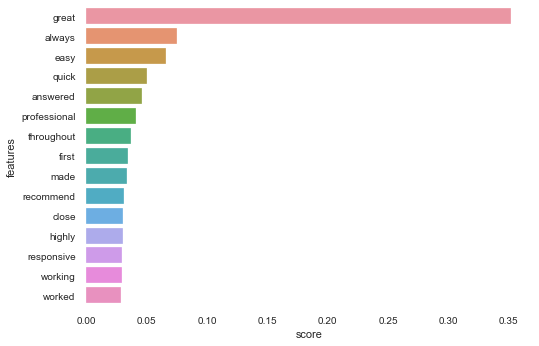

In [78]:
# cluster2 top 15 words
sns.barplot(x = 'score',y = 'features',data = df2)

<IPython.core.display.Javascript object>

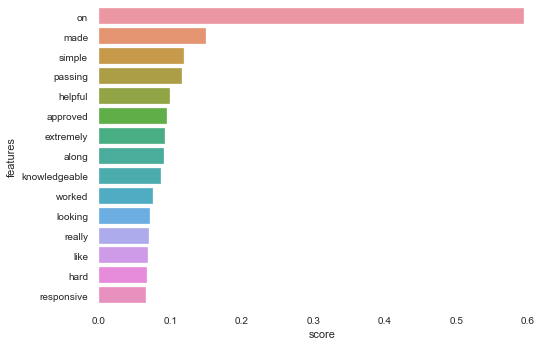

In [79]:
# cluster3 top 15 words
sns.barplot(x = 'score',y = 'features',data = df3)

### Vectorization (count,tfidf) for both train & test(word level tf-idf)

In [80]:
#Train 
count_vect = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,2),min_df=5,encoding='latin-1',max_features=800)
xtrain_count = count_vect.fit_transform(X_train)
tfidf_transformer  = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)
#Test
xtest_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(xtest_count)
dtm2 = pd.DataFrame(X_train_tfidf.toarray(),columns = count_vect.get_feature_names())
dtm2.head()

,aaron,able,able close,absolutely,accept,across,adam,additional,agent,ago,...,working,would,would completed,would definitely,would get,would highly,would recommend,wrong,wyndham,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.143639,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.227642,0.0,0.0,0.0,0.0,0.38617,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


### N-gram generators(n-gram level tf-idf)

In [81]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word',token_pattern='\w{1,}',ngram_range=(1,2),max_features=800)
tfidf_vect_ngram.fit(X)
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram = tfidf_vect_ngram.transform(X_test)

In [83]:
xtrain_tfidf_ngram

<404x800 sparse matrix of type '<class 'numpy.float64'>'
	with 4661 stored elements in Compressed Sparse Row format>

In [82]:
xtest_tfidf_ngram

<101x800 sparse matrix of type '<class 'numpy.float64'>'
	with 1143 stored elements in Compressed Sparse Row format>

### Character level tf-idf

In [84]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,2), max_features=800)
tfidf_vect_ngram_chars.fit(X)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

c:\python3.7\lib\site-packages\sklearn\feature_extraction\text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [85]:
xtrain_tfidf_ngram_chars

<404x800 sparse matrix of type '<class 'numpy.float64'>'
	with 40449 stored elements in Compressed Sparse Row format>

In [86]:
xtest_tfidf_ngram_chars

<101x800 sparse matrix of type '<class 'numpy.float64'>'
	with 10138 stored elements in Compressed Sparse Row format>

### Topic Modeling

In [87]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20,learning_method='online',max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_
vocab = count_vect.get_feature_names()
vocab

['aaron',
 'able',
 'able close',
 'absolutely',
 'accept',
 'across',
 'adam',
 'additional',
 'agent',
 'ago',
 'agreed',
 'all',
 'all financial',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'always available',
 'amazing',
 'american',
 'american saving',
 'annoyed',
 'another',
 'answer',
 'answered',
 'answering',
 'appreciated',
 'approved',
 'around',
 'ask',
 'asked',
 'asking',
 'aspect',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'based',
 'beat',
 'became',
 'begin',
 'beginning',
 'believe',
 'beneficial',
 'bent',
 'best',
 'best ever',
 'best possible',
 'better',
 'beyond',
 'big',
 'bought',
 'buy',
 'buying',
 'ca',
 'call',
 'called',
 'calling',
 'calm',
 'came',
 'came across',
 'can',
 'care',
 'causing',
 'certainly',
 'challenging',
 'changed',
 'chose',
 'chose naso',
 'clear',
 'clearly',
 'close',
 'closed',
 'closing',
 'come',
 'comfortable',
 'competitive',
 'complained',
 'complete',
 'completed',
 'completely',
 'complicated',
 'confid

In [88]:
# Topic Models
n_top_words = 10
topic_summaries = []
for i,topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
topic_summaries

['previous contracted lender steve professional beat working together great working look',
 'get done informed well done able get kept throughout knowledgeable great',
 'naso u thorough easy flex quick got excellent better closing',
 'all tormented efficient all financial financial incredible provided left entire go',
 'felt felt like monthly comfortable offer additional went beyond explain gave beyond',
 'guaranteed honest wonderful offered many outstanding provided beginning competitive stopped',
 'fred answered in whole always next professional call fast care',
 'many highly bought big steve enough can responsive highly recommend recommend',
 'followed given le naso rich successful experienced always available available always',
 'u steve given gave u understood gave along knew kept beginning',
 'can express wrong along naso dealing great best saved u military',
 'throughout beginning courteous unlike able certainly entire on made u',
 'on great helpful great made extremely told muc

### Creating a function for train models

In [89]:
def train_model(classifier,feature_vector_train,label,feature_vetor_valid,valid_y,is_neutral_net=False):
    classifier.fit(feature_vector_train,label) #fit training dataset on classifier
    predictions = classifier.predict(feature_vetor_valid) #Predict Labels on validation dataset
    if is_neutral_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions,valid_y)

## Naive Bayes

In [90]:
# Naive Bayes on count vector tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),X_train_tfidf,y_train,X_test_tfidf,y_test)
print('NB for L1,count vectors: ',accuracy_L1)
# Naive Bayes on Word Level tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),xtrain_count,y_train,xtest_count,y_test)
print('NB for L1,Wordlevel vectors: ',accuracy_L1)
# Naive Bayes on Ngram Level tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),xtrain_tfidf_ngram,y_train,xtest_tfidf_ngram,y_test)
print('NB for L1,N-Gram vectors: ',accuracy_L1)
# Naive Bayes on Character Level tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),xtrain_tfidf_ngram_chars,y_train,xtest_tfidf_ngram_chars,y_test)
print('NB for L1,charlevel vectors: ',accuracy_L1)

NB for L1,count vectors:  0.900990099009901
NB for L1,Wordlevel vectors:  0.9306930693069307
NB for L1,N-Gram vectors:  0.8415841584158416
NB for L1,charlevel vectors:  0.8217821782178217


### Predicting star rating using reviews

In [91]:
from collections import Counter
texts = [review for review in X_train]
stars = [review for review in y_train]
texts

['got done couldn closing even got done get done recommended went great',
 'increased quoted different different took needed mattered least',
 'seemed nice first played got interested would file left and remained incorrect since maybe said interested in die straight',
 'provided excellent smooth fast would recommend first',
 'super responsive thorough next answered promptly ben',
 'worked sam provide low low detailed introduced wonderful well clear close ahead impressed provided recommend know looking read',
 'can begin express happiness working aaron professional knowledgeable literally ended saving thousand thought good spoke able lower almost full saved u hundred per able approvedclosed tight highly recommend',
 'intake rep nice seemed annoyed that bad webster positive hope review past initial required & required pick selected poor honestly dont would leave blank',
 'quick easy answered recommend daytime rich great',
 'first w suggested mutual responsive every guy real highly recomm

In [92]:
stars

[5,
 1,
 1,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 1,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 1,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 1,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 1,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,


In [93]:
# Balancing the data
def balance_classes(xs,ys):
    #Undersample xs,ys to blalance classes
    freqs= Counter(ys)
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss:0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i,y in enumerate(ys):
        if(num_added[y]<max_allowable):
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] +=1
    return(new_xs,new_ys)

In [94]:
print(Counter(stars))
balanced_x,balanced_y = balance_classes(texts,stars)
print(Counter(balanced_y))

Counter({5: 327, 1: 77})
Counter({5: 77, 1: 77})


# SVM Classifier

In [95]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(balanced_x)

X_train,X_test,y_train,y_test = train_test_split(vectors,balanced_y,test_size = 0.2,random_state = 123)
classifier = LinearSVC() #initialise SVM Classifier
classifier.fit(X_train,y_train) # training Classifier

LinearSVC()

In [96]:
#predicting train data
train_pred = classifier.predict(X_train)
print(list(train_pred[:10]))
print(y_train[:10])

[5, 5, 5, 1, 5, 5, 5, 5, 1, 1]
[5, 5, 5, 1, 5, 5, 5, 5, 1, 1]


In [97]:
#predicting test data
test_preds = classifier.predict(X_test)
print(list(test_preds[:10]))
print(y_test[:10])

[5, 5, 1, 5, 1, 5, 1, 5, 1, 1]
[5, 5, 1, 5, 1, 5, 1, 5, 1, 1]


In [98]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_preds))

1.0


# SVM Classifier IS DONING BEST HERE 